# SVM

In [1]:
import pandas as pd
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

import utils

## Base Line

In [3]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# Create model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train["result"])

# Prediction
y_pred = svm_model.predict(X_test)

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.9911154031868662

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


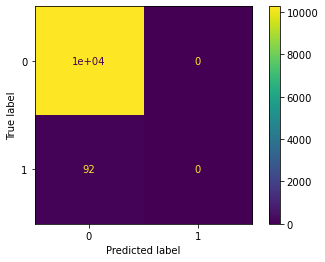

In [5]:
plot_confusion_matrix(svm_model, X_test, y_test["result"])
plt.show()

We observe the same issue, we had with the Naive Bayesian Classifier...  
Overfitting !!

## Balanced Classes

### Remove Individuals

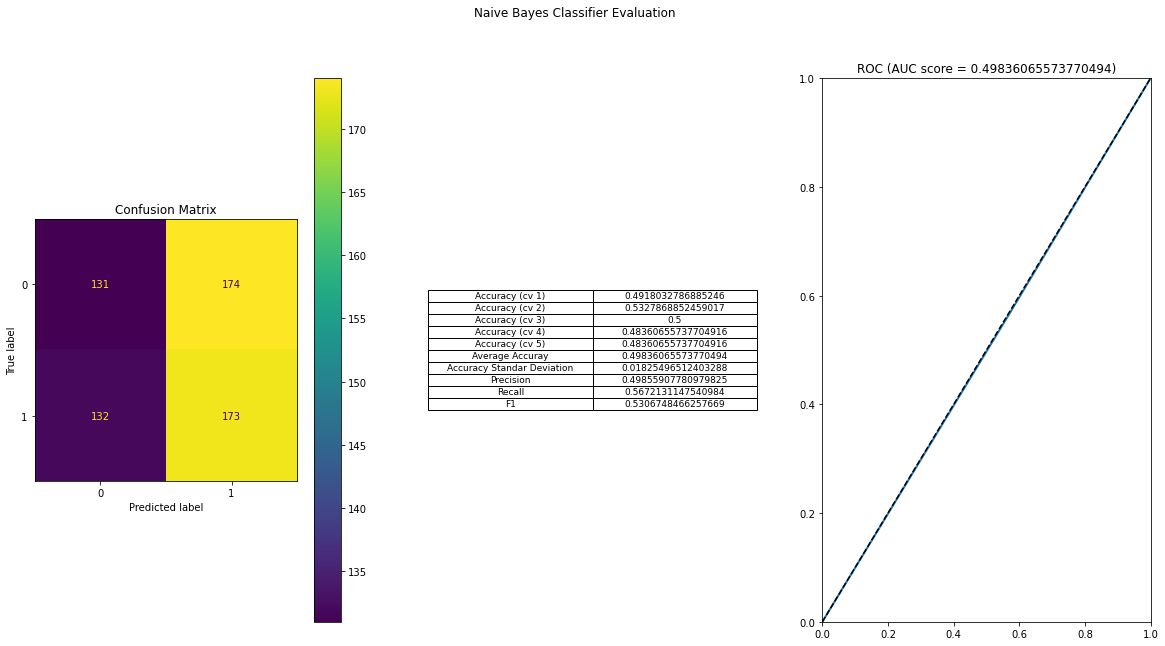

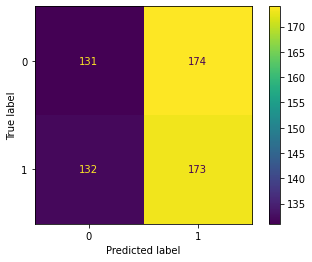

In [6]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)

# Create model
clf = svm.SVC()

# Evaluation
utils.modelEvaluation(clf, train_input, train_output["result"], model_name="SVM")

### Adapting Weights

In [7]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)

# Create model
clf = svm.SVC(class_weight="balanced")

# Evaluation
utils.modelEvaluation(clf, train_input, train_output["result"], model_name="SVM")